In [1]:
from tweet_processor import TweetProcessor
import pickle

dataset_file_path = 'datasets/hashtags-en-tweets.jsonl'

tweet_processor = TweetProcessor()
# word_emb_tweets = tweet_processor.preprocess_tweets_for_word_embedding(dataset_file_path)
sent_emb_tweets = tweet_processor.preprocess_tweets_for_sentence_embedding(dataset_file_path)

word_emb_model = pickle.load(open('save_files/word_emb_model.pkl', 'rb'))

/usr/local/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Processed Tweets

In [3]:
for tweet in word_emb_tweets[-3:]:
    print(
        f'> HASHTAGS: {tweet.hashtags}\n'
        f'> ORIGINAL: {tweet.original_tweet["text"]}\n'
        f'> PROCESSED: {tweet.text}\n'
    )
    print('-' * 100)

> HASHTAGS: ['#EidalFitr', '#Eid', '#LetsDoLondon', '#EidMubarak', '#LondonEye']
> ORIGINAL: 🌙 @TheLondonEye was illuminated this evening with a special crescent moon light display to mark Eid al-Fitr.

#EidalFitr #Eid #LetsDoLondon #EidMubarak #LondonEye https://t.co/ukRLvoHijE
> PROCESSED: illuminate this_evening special crescent moon light display mark eid_alfitr #EidalFitr #Eid #LetsDoLondon #EidMubarak #LondonEye

----------------------------------------------------------------------------------------------------
> HASHTAGS: ['#Eid', '#EidalFitr', '#Albania', '#EidMubarak', '#EidAroundTheWorld']
> ORIGINAL: Muslims in Albania participate in mass Eid prayer.

#Eid #EidalFitr #Albania #EidMubarak #EidAroundTheWorld https://t.co/K5ha2z0O3i
> PROCESSED: muslim albania participate_in mass eid prayer #Eid #EidalFitr #Albania #EidMubarak #EidAroundTheWorld

----------------------------------------------------------------------------------------------------
> HASHTAGS: ['#FarageOnGBNews']

In [5]:
for tweet in sent_emb_tweets[-3:]:
    print(
        f'> HASHTAGS: {tweet.hashtags}\n'
        f'> ORIGINAL: {tweet.original_tweet["text"]}\n'
        f'> PROCESSED: {tweet.text}\n'
    )
    print('-' * 100)

> HASHTAGS: ['#Eid', '#LetsDoLondon', '#EidMubarak']
> ORIGINAL: 🌙 @TheLondonEye was illuminated this evening with a special crescent moon light display to mark Eid al-Fitr.

#EidalFitr #Eid #LetsDoLondon #EidMubarak #LondonEye https://t.co/ukRLvoHijE
> PROCESSED: 🌙 was illuminated this_evening with a special crescent moon light display to mark eid al-fitr.

----------------------------------------------------------------------------------------------------
> HASHTAGS: ['#Eid', '#Albania', '#EidMubarak']
> ORIGINAL: Muslims in Albania participate in mass Eid prayer.

#Eid #EidalFitr #Albania #EidMubarak #EidAroundTheWorld https://t.co/K5ha2z0O3i
> PROCESSED: muslims in albania participate_in mass eid prayer.

----------------------------------------------------------------------------------------------------
> HASHTAGS: ['#FarageOnGBNews']
> ORIGINAL: 'Appalling, divisive, self-defeating. Shame on you the RAF for getting that so badly wrong’

@Nigel_Farage discuses the RAF asking for a

In [6]:
from collections import Counter

print(f'total number of tweets: {len(sent_emb_tweets)}')
unique_hashtags = set(hashtag for tweet in sent_emb_tweets for hashtag in tweet.hashtags)
print(f'number of unique hashtags: {len(unique_hashtags)}')
print('hashtag to count:')
hashtag_counter = Counter(hashtag for tweet in sent_emb_tweets for hashtag in tweet.hashtags)
print(hashtag_counter.most_common(30))

total number of tweets: 198954
number of unique hashtags: 3939
hashtag to count:
[('#Ukraine', 7123), ('#BREAKING', 7104), ('#UPDATE', 4947), ('#COVID19', 4362), ('#Russia', 3955), ('#affiliate', 3750), ('#TOLOnews', 3680), ('#Estonia', 3642), ('#Strictly', 3607), ('#AD', 3354), ('#COP26', 3254), ('#Russian', 3134), ('#ad', 2668), ('#KayBurley', 2052), ('#TomorrowsPapersToday', 2032), ('#Tunisia', 1976), ('#Ad', 1974), ('#SAFC', 1828), ('#AFPSports', 1568), ('#estonia', 1521), ('#StrictlyComeDancing', 1482), ('#Ukrainian', 1443), ('#Poland', 1284), ('#BBCBreakfast', 1124), ('#ImACeleb', 1106), ('#GMB', 1061), ('#TAP_En', 1041), ('#Northampton', 1026), ('#Emmerdale', 1010), ('#FORZAINTER', 1000)]


In [171]:
import random

hashtag = '#training'

tweets_with_hashtag = [tweet for tweet in sent_emb_tweets if hashtag in tweet.hashtags]
random.shuffle(tweets_with_hashtag)

for tweet in tweets_with_hashtag[:10]:
    print(tweet.text)
    print('-' * 130)

could your sme do with a boost? sign_up now for 12-week_programme offering practical training and one-to-one mentoring from a business expert.
----------------------------------------------------------------------------------------------------------------------------------
read"7 training myths that must die they might_be killing your gains!" by_ron harris and online_now at presented_by
----------------------------------------------------------------------------------------------------------------------------------
read "ideal meal: premium meal_replacement unlike anything on the market!" by bryan hildebrand and online_now at
----------------------------------------------------------------------------------------------------------------------------------
read "9 tips to build a bigger back" by_ron harris and online_now at
----------------------------------------------------------------------------------------------------------------------------------
read "intermittent fasting lose fat

In [177]:
from collections import Counter

# TODO REMOVE?

annotated_topics_file_path = 'datasets/top_hashtags_1.csv'

hashtags, topics = [], []
with open(annotated_topics_file_path, encoding='utf-8') as file:
    for line in file.readlines():
        hashtag, topic = line.strip().split(';')

        hashtags.append(hashtag)

        if topic != '':
            topics.append(topic)

print(len(hashtags), len(topics))
print(Counter(topics))

500 500
Counter({'tv_cinema': 110, 'local_news': 45, 'politics': 43, 'news': 40, 'ukraine': 31, 'society': 29, 'finance_work': 27, 'lifestyle': 27, 'awards_competition': 24, 'football': 19, 'music_radio': 19, 'sci_tech': 18, 'sports': 14, 'gaming': 13, 'covid': 11, 'climate': 10, 'middle_east': 10, 'religion': 10})


# Limit number of Tweets per Hashtag in the Dataset in Training

In [ ]:
from collections import defaultdict

_hashtag_to_tweets = defaultdict(list)
for tweet in sent_emb_tweets:
    for hashtag in tweet.hashtags:
        _hashtag_to_tweets[hashtag].append(tweet)

def get_num_sent_embs_to_generate_for_dataset(max_tweets_per_hashtags: int = None):
    num_sent_embs_to_generate_for_dataset = 0
    for hashtag in unique_hashtags_in_w2v_vocab:
        # all hashtags with < 10 tweets were filtered out before
        if max_tweets_per_hashtags:
            num_sent_embs_to_generate_for_dataset += min(len(_hashtag_to_tweets[hashtag]), max_tweets_per_hashtags) 
        else:
            num_sent_embs_to_generate_for_dataset += len(_hashtag_to_tweets[hashtag])

    return num_sent_embs_to_generate_for_dataset

print('sentence embeddings to generate for the dataset with no limit       on the number of tweets per hashtag: ' + str(get_num_sent_embs_to_generate_for_dataset()))
print('sentence embeddings to generate for the dataset with a limit = 10   on the number of tweets per hashtag: ' + str(get_num_sent_embs_to_generate_for_dataset(max_tweets_per_hashtags=10)))
print('sentence embeddings to generate for the dataset with a limit = 100  on the number of tweets per hashtag: ' + str(get_num_sent_embs_to_generate_for_dataset(max_tweets_per_hashtags=100)))
print('sentence embeddings to generate for the dataset with a limit = 500  on the number of tweets per hashtag: ' + str(get_num_sent_embs_to_generate_for_dataset(max_tweets_per_hashtags=500)))
print('sentence embeddings to generate for the dataset with a limit = 1000 on the number of tweets per hashtag: ' + str(get_num_sent_embs_to_generate_for_dataset(max_tweets_per_hashtags=1000)))

sentence embedding to generate for the dataset with no limit       on the number of tweets per hashtag: 264735
sentence embedding to generate for the dataset with a limit = 10   on the number of tweets per hashtag: 39130
sentence embedding to generate for the dataset with a limit = 100  on the number of tweets per hashtag: 134093
sentence embedding to generate for the dataset with a limit = 500  on the number of tweets per hashtag: 192849
sentence embedding to generate for the dataset with a limit = 1000 on the number of tweets per hashtag: 215668


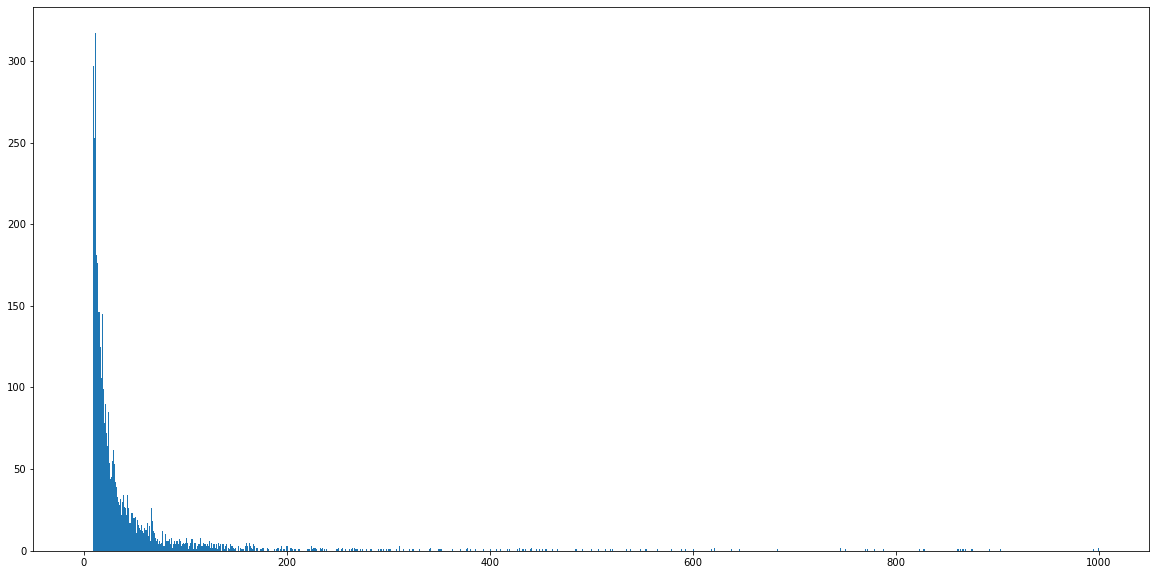

In [ ]:
tweets_per_hashtag = hashtag_counter.values()

plt.hist(tweets_per_hashtag, range=(0, 1000), bins=round((len(tweets_per_hashtag) / 4)))
fig = plt.gcf()
fig.set_size_inches(20, 10)

plt.show()

# Visualize Top 26 Hashtags in Word2Vec Space

In [9]:
from sklearn.decomposition import PCA
import pickle
import matplotlib.pyplot as plt

pca = PCA(n_components=2)

word_emb_model = pickle.load(open('save_files/word_emb_model.pkl', 'rb'))

top_hashtags = [hashtag for hashtag, _ in hashtag_counter.most_common(26)]

word_embs = [word_emb_model.get_embedding(hashtag) for hashtag in top_hashtags]

two_dim_word_embs = pca.fit_transform(word_embs)

x, y = two_dim_word_embs[:, 0], two_dim_word_embs[:, 1] 

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.scatter(x, y)

for i, hashtag in enumerate(top_hashtags):
    ax.annotate(hashtag, (x[i], y[i]))


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:616: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  array = np.asarray(array, order=order, dtype=dtype)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (26,) + inhomogeneous part.

# Visualize Word2Vec vs Transformed Word2Vec: All & selected Hashtags with topics

In [2]:
import pickle

import torch

from hashtag_to_sent_mapper import Hashtag2SentMapper
from word_embedding_model import WordEmbeddingModel
from dataset import DataModule
from hashtag_analyzer import HashtagAnalyzer
from sentence_embedding_model import SentenceEmbeddingModel

word_emb_model = pickle.load(open('save_files/word_emb_model.pkl', 'rb'))
sent_emb_model = SentenceEmbeddingModel()
data_module = DataModule.restore_from_file()
hashtag_to_sent_mapper = Hashtag2SentMapper.load_from_checkpoint(
    'save_files/best_model.ckpt', 
    in_features=data_module.in_features, 
    out_features=data_module.out_features,
    hidden_layer1_size=300, hidden_layer2_size=500
)

hashtag_analyzer = HashtagAnalyzer(sent_emb_tweets, word_emb_model, hashtag_to_sent_mapper)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


explained_variance: PCA, two components: [0.19216127 0.10526308]


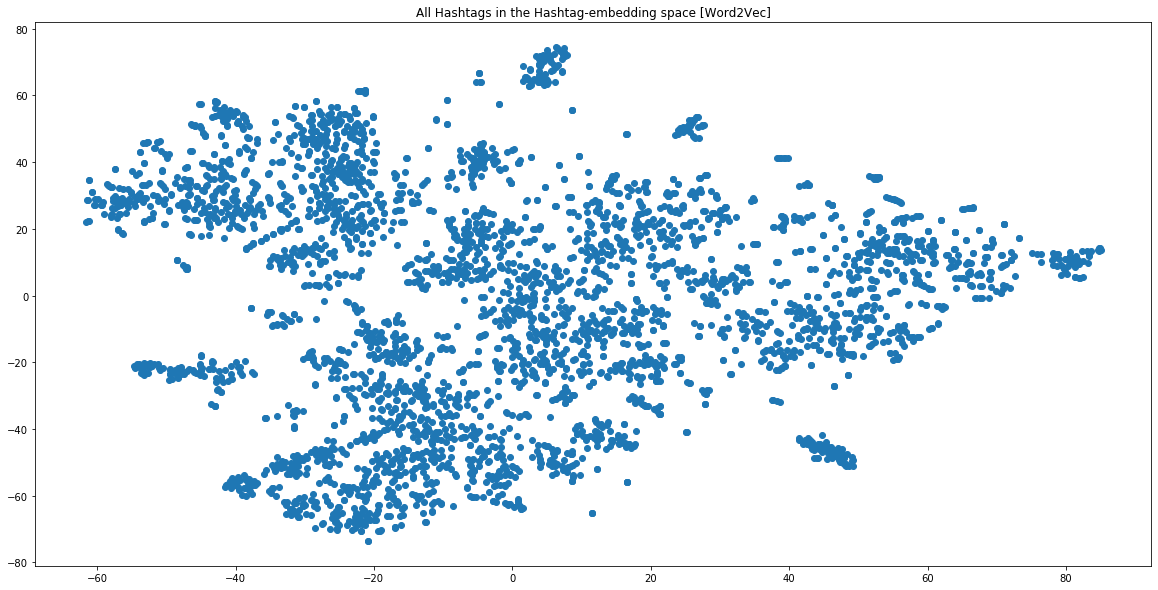

In [3]:
hashtag_analyzer.plot_all_hashtags()

explained_variance: PCA, two components: [0.86224888 0.03361489]


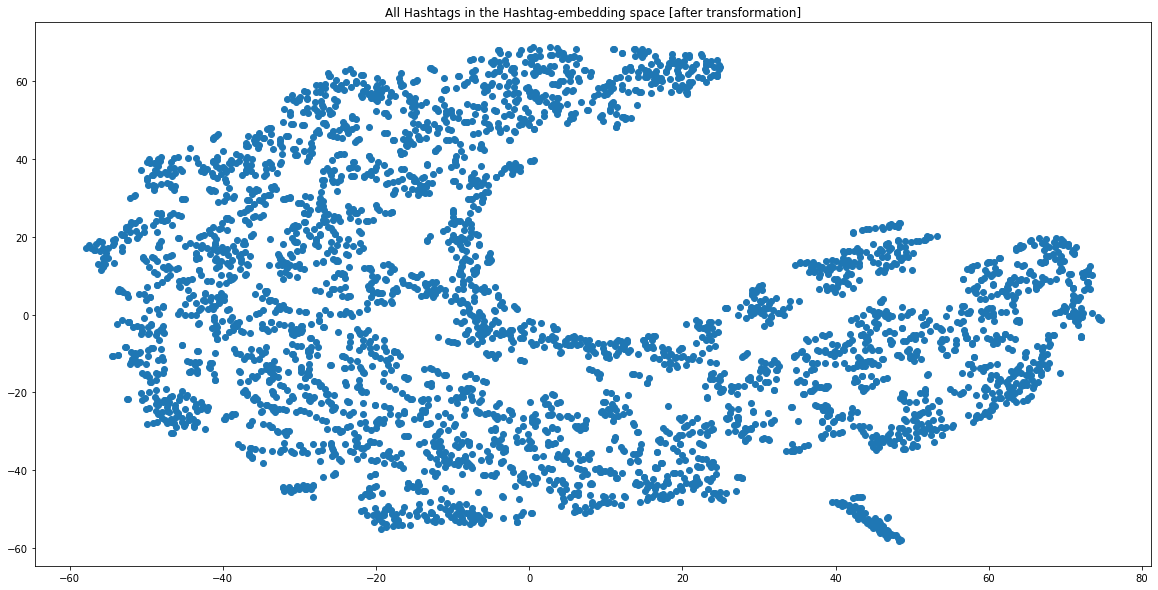

In [4]:
hashtag_analyzer.plot_all_hashtags(after_transformation=True)

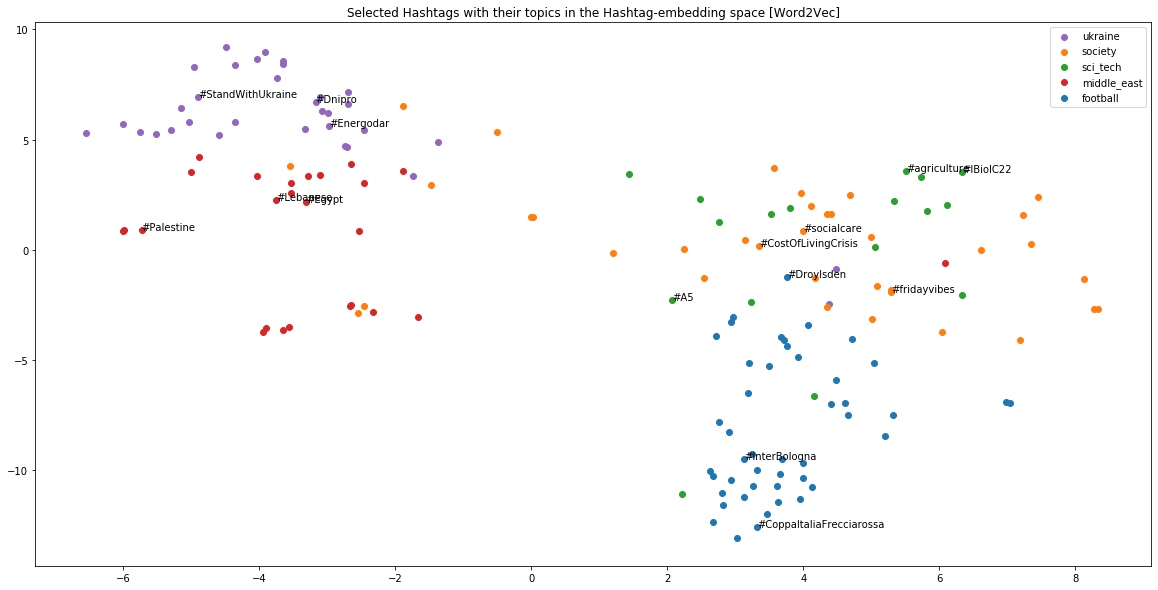

In [5]:
hashtag_analyzer.plot_hashtags_with_topics('datasets/top_hashtag_0_and_3_part_annotations_ori.csv')

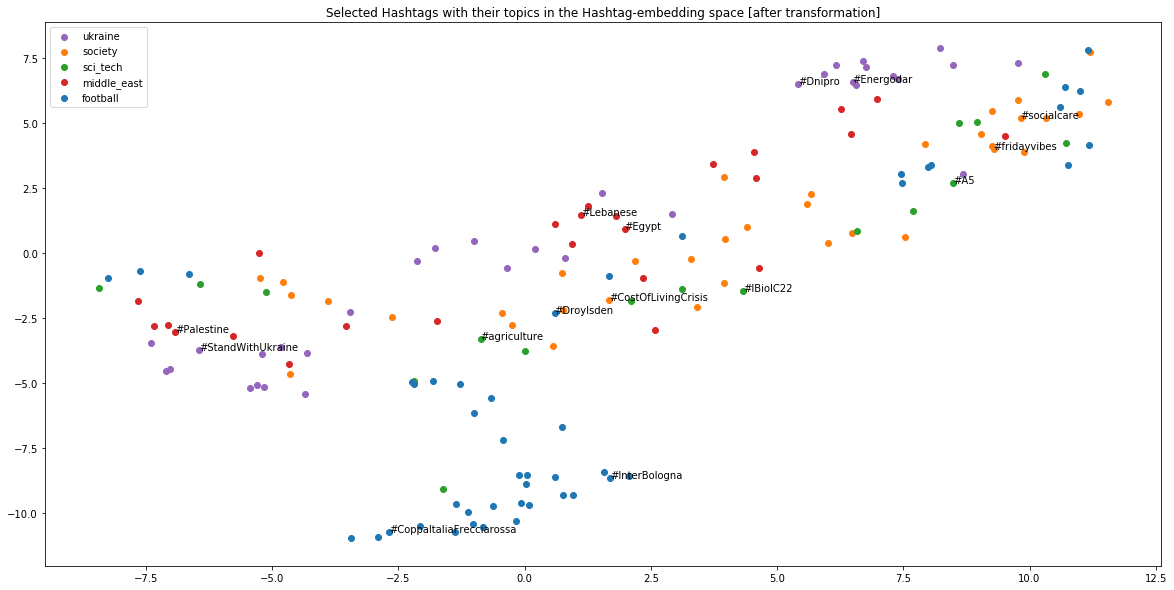

In [6]:
hashtag_analyzer.plot_hashtags_with_topics(
    'datasets/top_hashtag_0_and_3_part_annotations_ori.csv', after_transformation=True
)

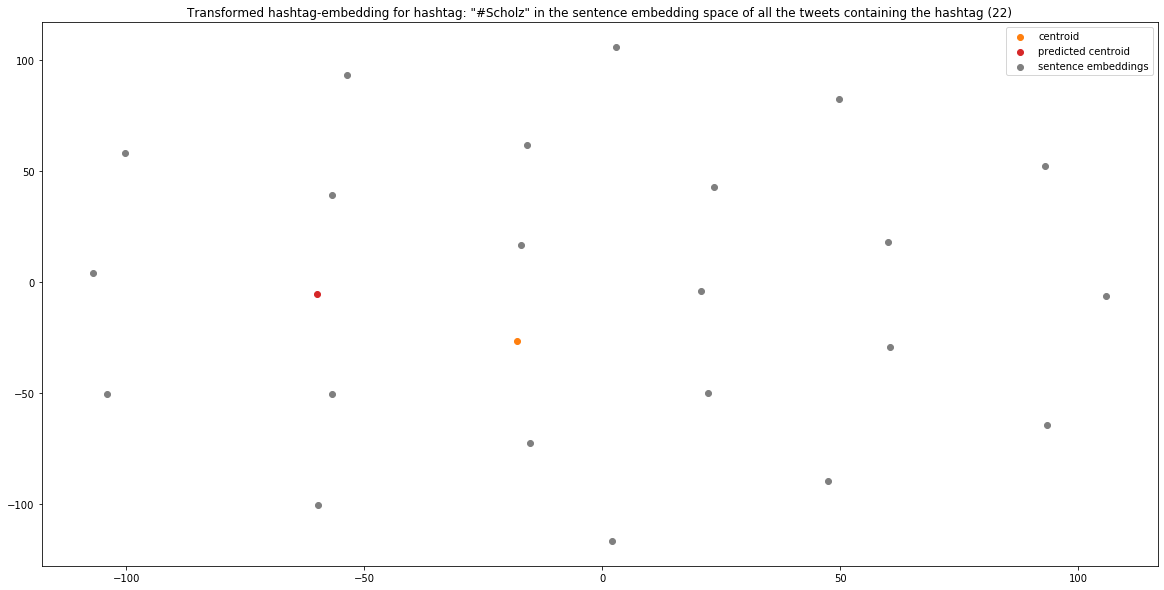

In [7]:
hashtag_analyzer.plot_a_hashtag('#Scholz', sent_emb_model)

explained_variance: PCA, two components: [0.20455072 0.09883722]


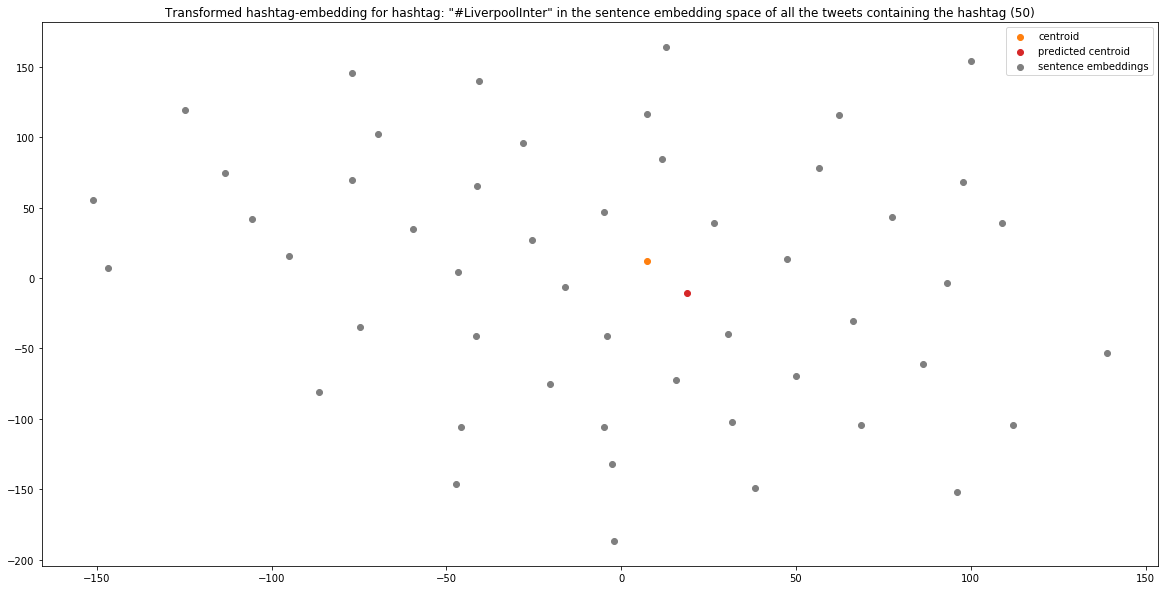

In [5]:
hashtag_analyzer.plot_a_hashtag('#LiverpoolInter', sent_emb_model)

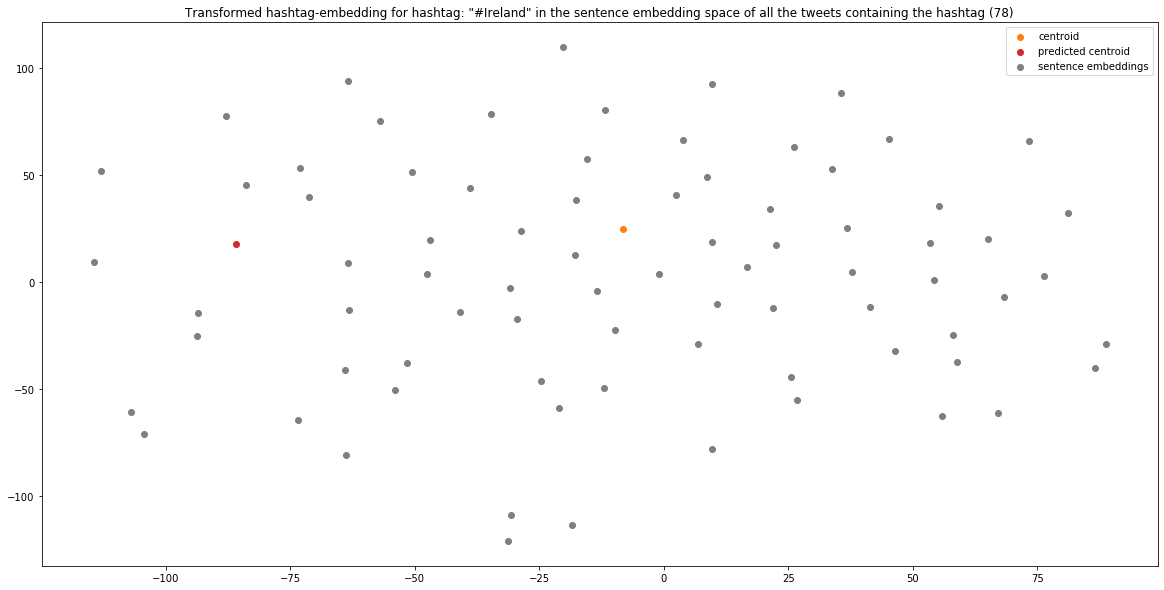

In [9]:
hashtag_analyzer.plot_a_hashtag('#Ireland', sent_emb_model)

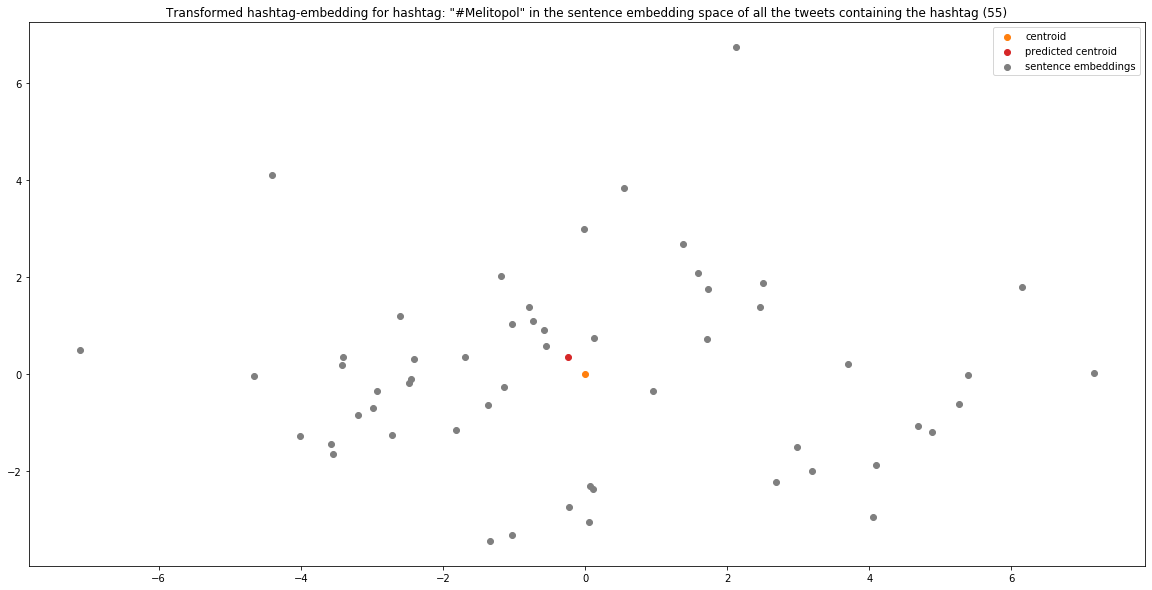

In [6]:
hashtag_analyzer.plot_a_hashtag('#Melitopol', sent_emb_model)

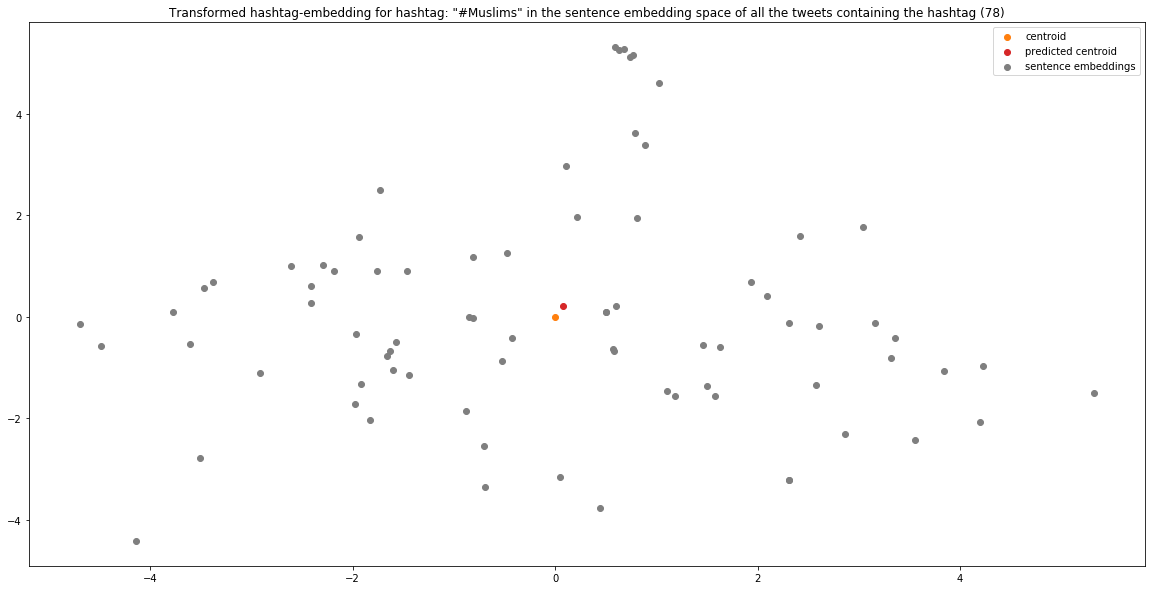

In [7]:
hashtag_analyzer.plot_a_hashtag('#Muslims', sent_emb_model)

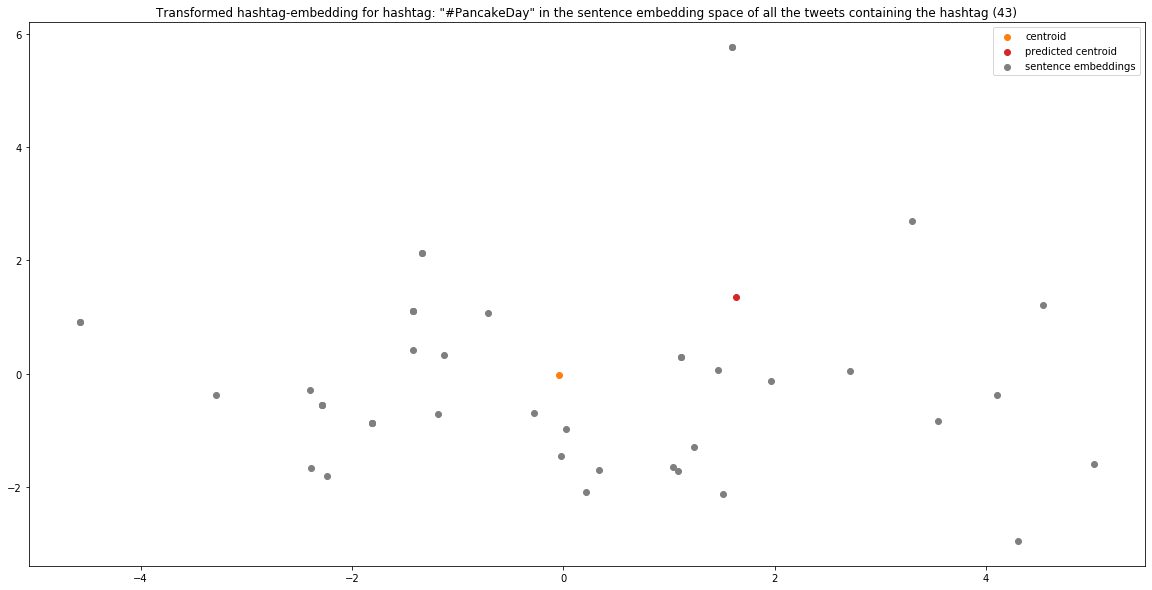

In [8]:
hashtag_analyzer.plot_a_hashtag('#PancakeDay', sent_emb_model)

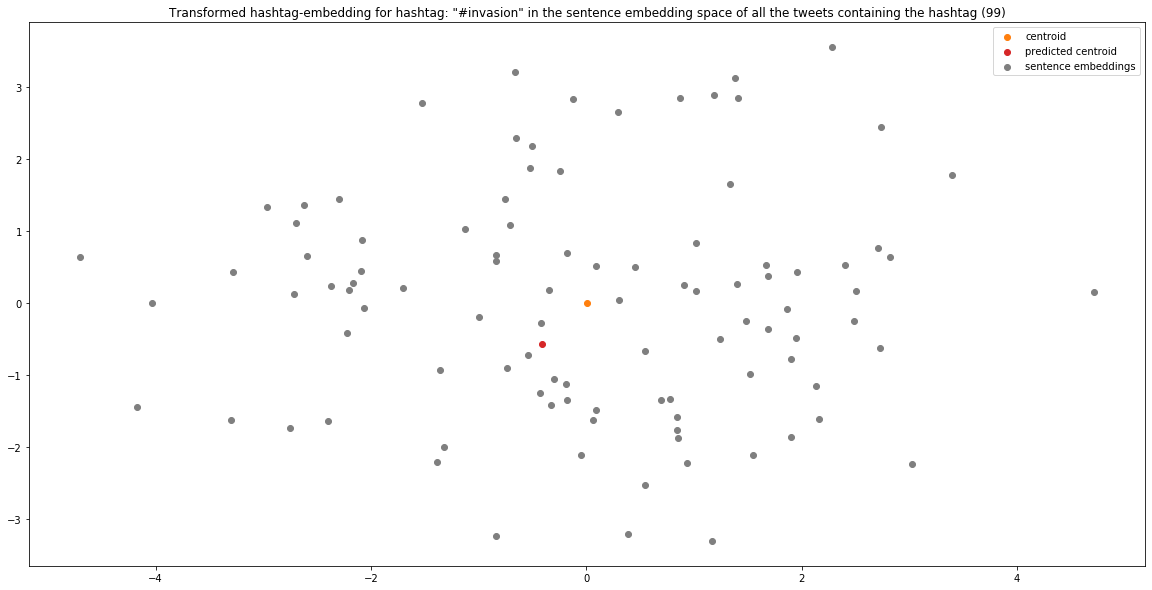

In [9]:
hashtag_analyzer.plot_a_hashtag('#invasion', sent_emb_model)

retrieving sentence embeddings ... [0 / 500]
retrieving sentence embeddings ... [20 / 500]
retrieving sentence embeddings ... [40 / 500]
retrieving sentence embeddings ... [60 / 500]
retrieving sentence embeddings ... [80 / 500]
retrieving sentence embeddings ... [100 / 500]
retrieving sentence embeddings ... [120 / 500]
retrieving sentence embeddings ... [140 / 500]
retrieving sentence embeddings ... [160 / 500]
retrieving sentence embeddings ... [180 / 500]
retrieving sentence embeddings ... [200 / 500]
retrieving sentence embeddings ... [220 / 500]
retrieving sentence embeddings ... [240 / 500]
retrieving sentence embeddings ... [260 / 500]
retrieving sentence embeddings ... [280 / 500]
retrieving sentence embeddings ... [300 / 500]
retrieving sentence embeddings ... [320 / 500]
retrieving sentence embeddings ... [340 / 500]
retrieving sentence embeddings ... [360 / 500]
retrieving sentence embeddings ... [380 / 500]
retrieving sentence embeddings ... [400 / 500]
retrieving sentence

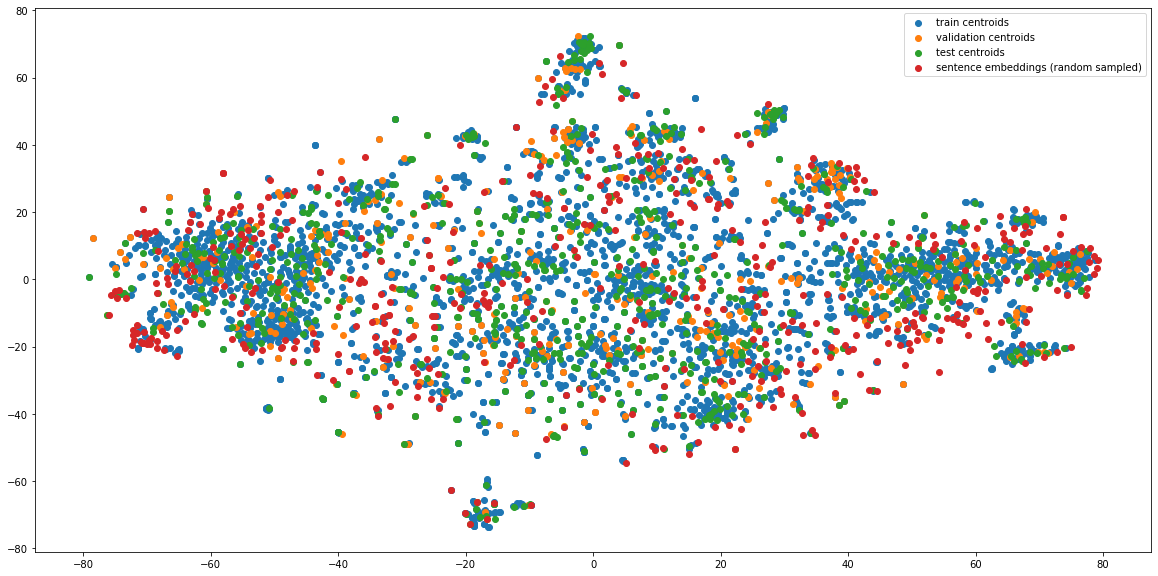

In [10]:
hashtag_analyzer.plot_sentence_embeddings_vs_centroids(data_module, sent_emb_model)

In [3]:
hashtag_analyzer.calculate_hashtag_embedding_metrics(topics_file_path='datasets/top_hashtags.csv')

{'clusters': 57, 'mean_silhouette': 0.13636093, 'mean_AMI': 0.2642706850101382}

In [4]:
hashtag_analyzer.calculate_hashtag_embedding_metrics(topics_file_path='datasets/top_hashtags.csv', after_transformation=True)

{'clusters': 57, 'mean_silhouette': 0.1268191, 'mean_AMI': 0.11638506269254183}